In [1]:
import pandas as pd

import scipy.stats as st

# Для построение графиков импортируем 2 библиотеки
import matplotlib.pyplot as plt
import seaborn as sns

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

from sklearn.model_selection import train_test_split

# Матрица неточности
from sklearn.metrics import confusion_matrix

# Оценка точности
from sklearn.metrics import accuracy_score

# Импортируем LDA-функционал 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Признаки:

    1. satisfaction_level​- Уровень удовлетворенности работой
    2. Last_evaluation -​ Время с момента последней оценки в годах
    3. number_projects​- Количество проектов, выполненных за время работы
    4. average_monthly_hours​- Среднее количество часов на рабочем месте в месяц
    5. time_spend_company​- Стаж работы в компании в годах
    6. work_accident​- Происходили ли несчастные случаи на рабочем месте с сотрудником
    7. left​- уволился ли сотрудник
    8. promotion_last_5years​- повышался ли сотрудник за последние пять лет
    9. department -​ отдел в котором работает сотрудник
    10. salary​- относительный уровень зарплаты

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### 1. Расчет основных статистик

In [3]:
df.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [4]:
# Вычеслим моду
df.mode(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


### 2. Построение корреляционной матрицы

In [5]:
df.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


<AxesSubplot:>

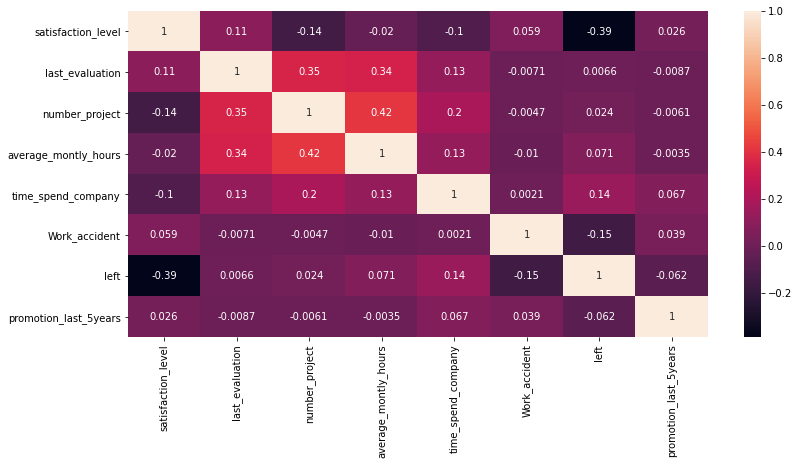

In [6]:
sns.heatmap(df.corr(), annot=True)

Наиболее скоррелированные переменные это 'number_project' и 'average_montly_hours'

Наименее скоррелированные переменные это 'Work_accident	' и 'ime_spend_company'

### 3. Распределение сотрудников по департаментам

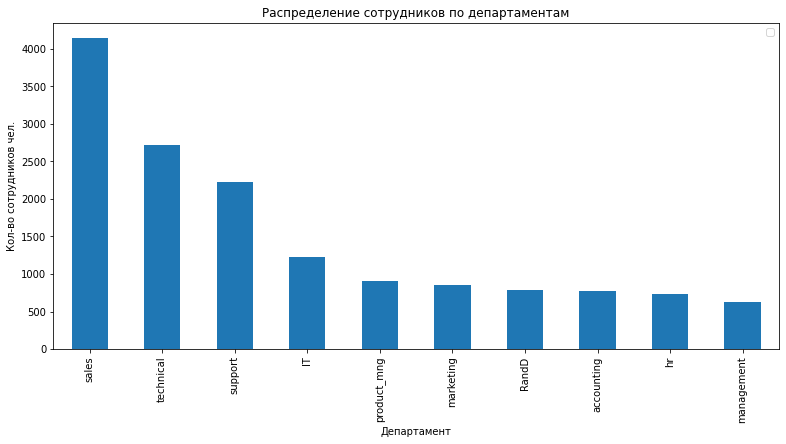

In [7]:
Dep = df[['department']].value_counts().reset_index()
Dep.columns = ['department', 'count']
Dep.plot(kind='bar',
            x = 'department', 
            title = 'Распределение сотрудников по департаментам',
            xlabel='Департамент',
            ylabel='Кол-во сотрудников чел.').legend('')
# ?df.plot

Наибольшая часть сотрудников работала в отделах sales, technical, support.

### 4. Распределение сотрудников по зарплатам

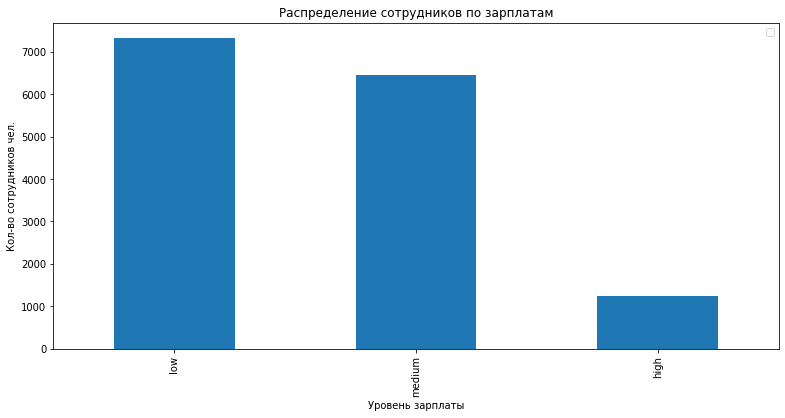

In [8]:
Salary = df[['salary']].value_counts().reset_index()
Salary.columns = ['salary', 'count']
Salary.plot(kind='bar',
            x = 'salary', 
            title = 'Распределение сотрудников по зарплатам',
            xlabel='Уровень зарплаты',
            ylabel='Кол-во сотрудников чел.').legend('')

### 5. Распределение сотрудников по зарплатам в каждом департаменте по отдельности

<AxesSubplot:xlabel='department'>

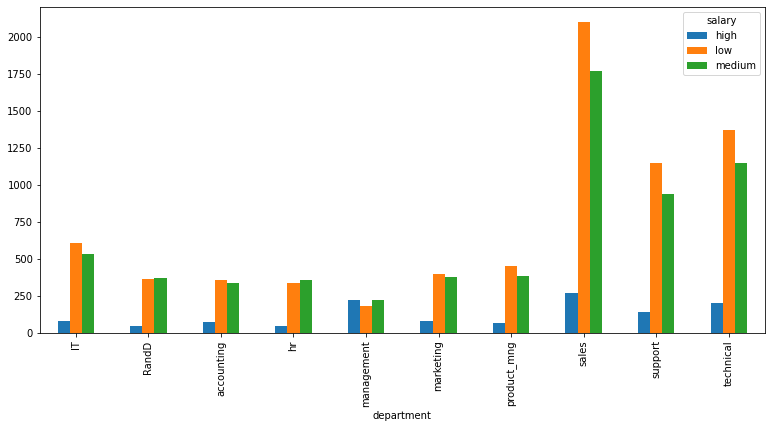

In [9]:
Dep_group = df[['department', 'salary','left']]
Dep_salary = Dep_group.pivot_table('left', index = 'department', columns = 'salary', aggfunc = 'count')
Dep_salary.plot.bar()

Management имеет наибольшее количество сотрудников с высоким окладом по отношению к уровню зарплат в департаментах.

### 6. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

**Гипотизы:**

    H0: Сотрудники проводят одинаковое количество времени на работе
    H1: Сотрудниики с высоким и низким окладом проводят разное время на работе

In [10]:
high_salary = df[df['salary']=='high'].average_montly_hours
low_salary = df[df['salary']=='low'].average_montly_hours

In [11]:
Test = st.ttest_ind(high_salary, low_salary, equal_var = False)
print(f'p-value = {round(Test.pvalue, 3)}')
print(f'statistic = {round(Test.statistic, 3)}')
# уровень значимости

alpha = 0.05
print(f'Уровень значимости: {alpha}')

if (Test.statistic < 0 or Test.statistic > 0) & (Test.pvalue  < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую нулевую гипотезу')

p-value = 0.446
statistic = -0.762
Уровень значимости: 0.05
Не отвергаем нулевую нулевую гипотезу


In [12]:
Salary_and_hours = df[['average_montly_hours', 'salary']]

Salary_group = Salary_and_hours.groupby(['salary']).agg({'average_montly_hours':['mean', 'std', 'median', 'max', 'min']}).reset_index()
Salary_group

salary average_montly_hours                           
                          mean        std median  max min
0    high           199.867421  47.710446    199  307  96
1     low           200.996583  50.832214    199  310  96
2  medium           201.338349  49.344188    201  310  96

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

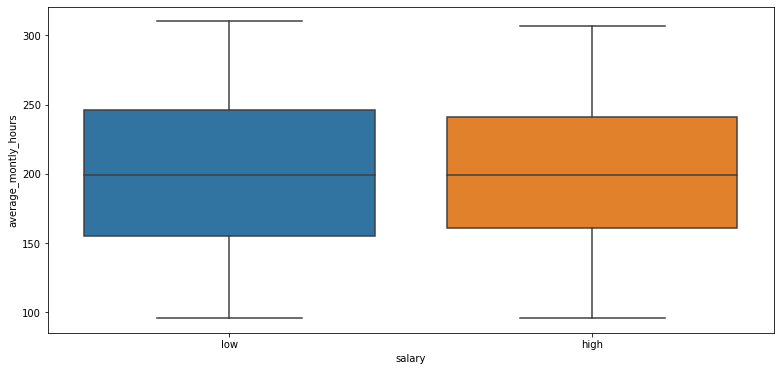

In [13]:
sns.boxplot(x="salary", y="average_montly_hours", 
            data=df[Salary_and_hours.salary.isin(['high', 'low'])])

На графике и в табличных данных видим, что сотрудники с низким и высоким окладом проводят время на работе одинаково.

### 7. Показатели среди уволившихся и не уволившихся сотрудников

Средняя степень удовлетворенности и среднее количество проектов среди уволившихся и не уволившихся сотрудников

In [14]:
Left = df.groupby(['left']).agg({'number_project':'mean',
                                'satisfaction_level':'mean'}).reset_index()
Left

,left,number_project,satisfaction_level
0,0,3.786664,0.666810
1,1,3.855503,0.440098


Уволившиеся и оставшиеся на работе сотрудники выполняли одинаковое количество проектов.

Уволившиеся сотрудники были недовольны своей работой! 

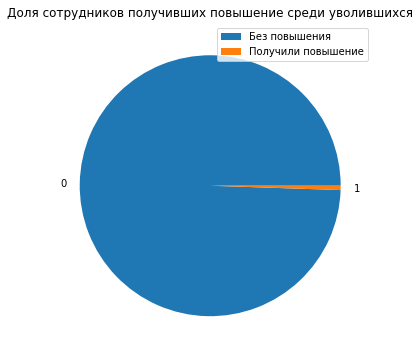

In [15]:
Promotion = df[df['left']==1].promotion_last_5years.value_counts()
Promotion.plot(kind='pie',
               title = 'Доля сотрудников получивших повышение среди уволившихся',
               ylabel=''
               ).legend(['Без повышения', 'Получили повышение'])

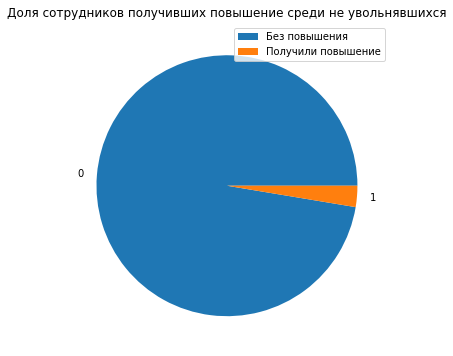

In [16]:
Promotion = df[df['left']==0].promotion_last_5years.value_counts()
Promotion.plot(kind='pie',
               title = 'Доля сотрудников получивших повышение среди не увольнявшихся',
               ylabel=''
               ).legend(['Без повышения', 'Получили повышение'])

Уволившиеся сотрудники не получали повышения. Всего 19 человек или 0.5% людей получили повышение. 

Это говорит о том, что сотрудники проработали значительно меньше 5 лет и ушли из компании не успев получить 

повышение, и сотрудников не устраивала работа, они увольнялись.

### 8. Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов

In [17]:
X = df[['satisfaction_level','last_evaluation', 'number_project', 
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years']]
Y = df['left']

# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

# Смотри сколько у нас значений в тренировоцном цикле и в тестовом

print(f'Тренировочных значений: {y_train.shape[0]} ')
print(f'Тестовых значений: {y_test.shape[0]} ')
    
# Записываем LDA-функционал в переменную lda
lda = LinearDiscriminantAnalysis()
    
# обучаем данные для дискриминантного анализа
lda.fit(X_train, y_train)
    
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)
    
# Оценка точности
print(f'Оценка точности: {round(accuracy_score(y_test, lda.predict(X_test)), 3)}')

# Матрица неточности
print('Матрица неточности:') 
print(confusion_matrix(y_test, y_pred)) 

print('----------------')
    
# коэффициенты дискриминатных линий «коэффициенты при неизвестной»
lda.coef_
print(f'Коэффициенты при неизвестной:')
print(lda.coef_[0:])
# «свободные члены»
lda.intercept_
print('----------------')
print(f'Cвободный член:')
print(lda.intercept_[0:])

Тренировочных значений: 10499 
Тестовых значений: 4500 
Оценка точности: 0.756
Матрица неточности:
[[3138  290]
 [ 809  263]]
----------------
Коэффициенты при неизвестной:
[[-4.57738626e+00  6.13822647e-01 -2.10613368e-01  4.55442333e-03
   2.21314862e-01 -1.05033789e+00 -1.08559074e+00]]
----------------
Cвободный член:
[0.14022001]


Полученная модель имеет точность 75%

Коэффициенты дискриминантных линий показывают, что наибольшее влияние оказывает - satisfaction_level (уровень удовлетворенности работой). 
Слабо оказывают влияние: average_montly_hours, number_project, last_evaluation, time_spend_company.